In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

from itertools import cycle, islice

In [2]:
plt.rcParams['figure.figsize'] = 12,8

In [32]:
np.random.seed(0)

# Количество объектов в каждом датасете
n_samples = 1500

# Кластеры в форме круга
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
X, y = blobs
blobs = X

# Кластеры в форме кругов с различной дисперсией
X, y = datasets.make_blobs(n_samples = n_samples, random_state=random_state, cluster_std=[1.0, 2.5, 0.5])
varied = X

# Кластеры лентовидной формы
random_state=170
X, y = datasets.make_blobs(n_samples = n_samples, random_state=random_state)
transformation = [[0.6, -0.6],[-0.4, 0.8]]
aniso = np.dot(X,transformation)

# Вписанные круги
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
# Оставляем только признаки датасета, т.к. для кластеризации нам не нужны истинные классы объектов
X, y = noisy_circles
noisy_circles = X

# Полукруги
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
X, y = noisy_moons
noisy_moons = X

# Отсутствие кластерной структуры
no_structure = np.random.rand(n_samples, 2)

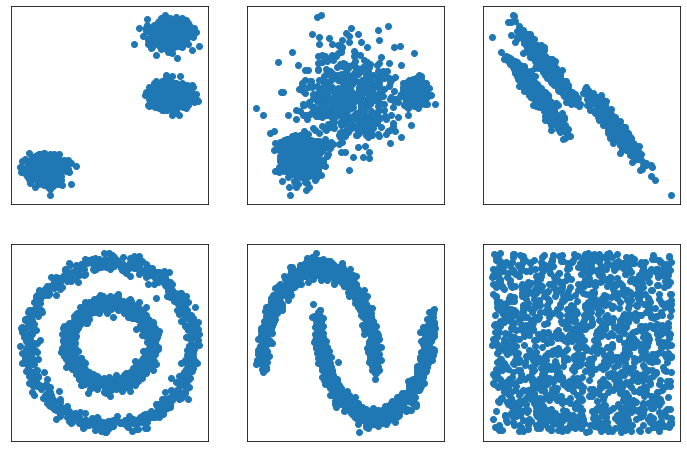

In [33]:
# Визуализируем кластеры
datasets_list = [blobs, varied, aniso, noisy_circles, noisy_moons, no_structure]
for i, X in enumerate(datasets_list, start=1):
    plt.subplot(230+i)
    plt.xticks([]); plt.yticks([])
    plt.scatter(X[:,0], X[:,1])


# KMeans

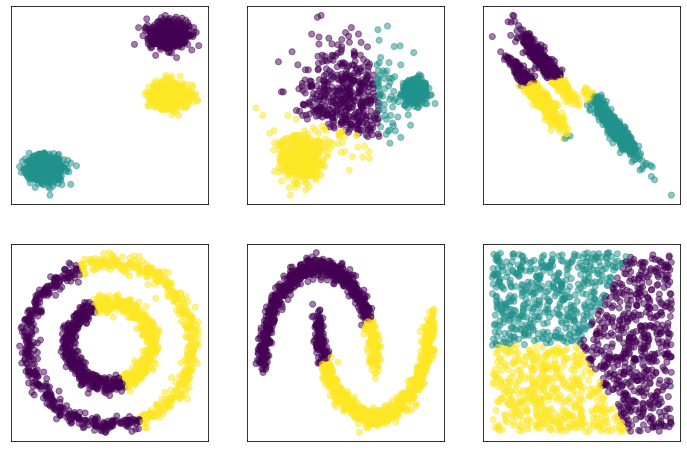

In [178]:
from sklearn.cluster import KMeans

datasets_params_list = [(blobs, {'n_clusters': 3}),
                        (varied, {'n_clusters': 3}),
                        (aniso, {'n_clusters': 3}),
                        (noisy_circles, {'n_clusters': 2}),
                        (noisy_moons, {'n_clusters': 2}),
                        (no_structure, {'n_clusters': 3})]

colors = ['#377eb8', '#ff7f00', '#4daf4a',
          '#f781bf', '#a65628', '#984ea3',
          '#999999', '#e41a1c', '#dede00']

for i, (X, params) in enumerate(datasets_params_list, start=1):
    X = StandardScaler().fit_transform(X)
    y_pred = KMeans(n_clusters = params['n_clusters']).fit(X).predict(X)
    
    #X = np.column_stack((X,y_pred))
        
    plt.subplot(230+i)
    plt.xticks([]); plt.yticks([])
    
    #for c in set(y_pred):
    #    X_tmp = X[np.where(y_pred==c)]
    #    plt.scatter(X_tmp[:,0], X_tmp[:,1], color=colors[c])
    plt.scatter(X[:,0], X[:,1], c=y_pred, alpha=.5)

In [193]:
n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0,7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2,_ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4,-3]],
                            cluster_std=[1.9])
transformation = [[1.2,-0.8],[-0.4,1.7]]
X_2 = np.dot(X_2,transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

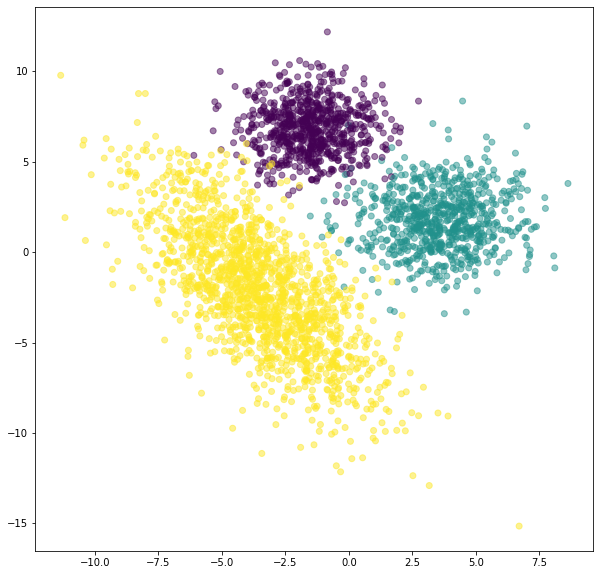

In [202]:
plt.rcParams['figure.figsize'] = 10,10
plt.rcParams['figure.facecolor'] = 'w'
plt.scatter(X[:,0], X[:,1], c=y, alpha=.5)
plt.show()

In [207]:
# Посмотрим распределение классов в данных
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))

{0: 750, 1: 750, 2: 1500}

In [223]:
k_means = KMeans(n_clusters=3, random_state=42)
k_means.fit(X)

print(np.round(k_means.cluster_centers_).astype(int))

[[-3 -3]
 [-2  6]
 [ 4  2]]


In [224]:
clusters, counts = np.unique(k_means.labels_, return_counts=True)
dict(zip(clusters, counts))

{0: 1320, 1: 938, 2: 742}

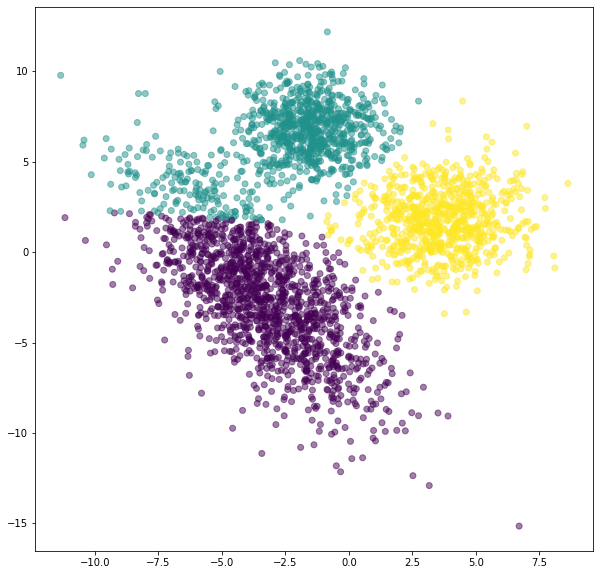

In [225]:
plt.rcParams['figure.figsize'] = 10,10
plt.rcParams['figure.facecolor'] = 'w'
plt.scatter(X[:,0], X[:,1], c=k_means.labels_, alpha=.5)
plt.show()

In [313]:
data = pd.read_csv('snsdata.csv')
data.tail()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
29995,2009,M,16.115,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,2009,M,15.792,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,2009,M,15.784,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,2009,M,16.378,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29999,2009,F,18.724,3,2,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [314]:
data.describe()

,gradyear,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
count,30000.000000,24914.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,2007.500000,17.993950,30.179467,0.267333,0.252300,0.222767,0.161200,0.143133,0.13440,0.106633,...,0.098933,0.257367,0.353000,0.14850,0.069867,0.051167,0.184100,0.114233,0.087967,0.060433
std,1.118053,7.858054,36.530877,0.804708,0.705357,0.917226,0.739707,0.639943,0.51699,0.514333,...,1.942319,0.695758,0.724391,0.47264,0.346779,0.279555,0.624516,0.436796,0.399125,0.345522
min,2006.000000,3.086000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.750000,16.312000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.500000,17.287000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2008.250000,18.259000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2009.000000,106.927000,830.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.00000,9.000000,...,327.000000,12.000000,11.000000,8.00000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


In [315]:
data.columns

Index(['gradyear', 'gender', 'age', 'friends', 'basketball', 'football',
       'soccer', 'softball', 'volleyball', 'swimming', 'cheerleading',
       'baseball', 'tennis', 'sports', 'cute', 'sex', 'sexy', 'hot', 'kissed',
       'dance', 'band', 'marching', 'music', 'rock', 'god', 'church', 'jesus',
       'bible', 'hair', 'dress', 'blonde', 'mall', 'shopping', 'clothes',
       'hollister', 'abercrombie', 'die', 'death', 'drunk', 'drugs'],
      dtype='object')

<AxesSubplot:>

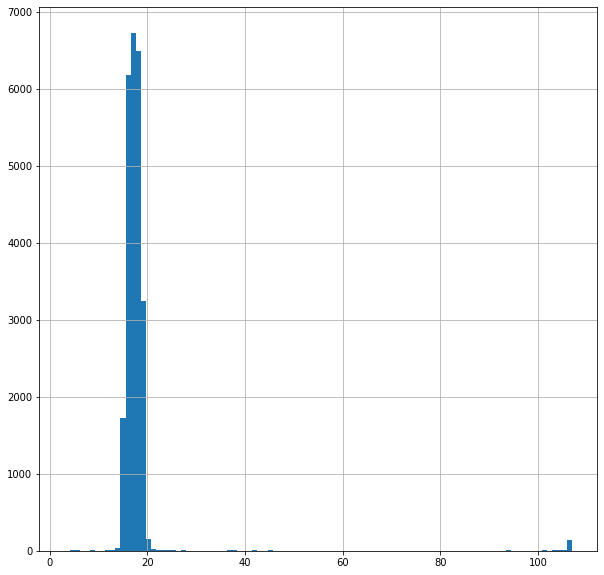

In [316]:
data.age.hist(bins=100)

In [317]:
X = np.array(data.drop(['gradyear', 'gender', 'age', 'friends'], axis=1))
X = StandardScaler().fit_transform(X)
k_means = KMeans(n_clusters=9, random_state=123)
k_means.fit(X)

KMeans(n_clusters=9, random_state=123)

In [318]:
clusters, counts = np.unique(k_means.labels_, return_counts=True)
dict(zip(clusters, counts))

{0: 5036, 1: 1337, 2: 752, 3: 697, 4: 20024, 5: 1, 6: 846, 7: 466, 8: 841}

In [241]:
data['cluster'] = k_means.labels_

In [247]:
data[data.drunk>5]

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,cluster
1213,2006,M,18.626,37,0,1,0,0,0,0,...,0,0,0,0,0,0,0,7,0,1
2265,2006,NaN,NaN,55,1,0,0,0,0,0,...,1,0,0,0,0,3,1,6,0,1
2973,2006,F,18.264,0,0,6,0,0,0,0,...,0,0,0,0,0,0,0,7,0,1
5216,2006,M,18.861,46,0,0,0,0,0,0,...,1,0,0,0,0,0,0,6,0,1
5451,2006,NaN,NaN,2,0,1,0,0,0,0,...,0,0,0,0,0,1,0,6,0,1
6516,2006,M,18.374,64,0,0,0,0,0,0,...,0,0,1,0,1,2,1,8,4,1
8003,2007,F,17.572,28,1,2,0,1,0,0,...,3,0,1,0,0,1,0,7,1,6
12223,2007,F,17.432,15,0,0,0,0,0,0,...,2,0,0,0,0,2,0,7,0,1
12453,2007,F,17.284,45,0,1,0,0,0,0,...,0,0,1,0,0,0,0,8,0,1
12929,2007,F,17.133,129,0,2,0,0,1,0,...,0,1,0,0,0,1,1,8,0,1


In [300]:
df = data.drop(['gradyear', 'gender', 'age', 'friends'], axis=1)
clusters = []
top_words = []
for k,group in df.groupby(data.cluster):
    clusters.append(k)
    top_words.append(list(group.drop('cluster', axis=1).sum().sort_values(ascending=False).index[:10]))
my_dict = dict(zip(clusters,top_words))
for key in my_dict.keys():
    my_dict[key].sort()
my_dict

{0: ['basketball',
  'church',
  'cute',
  'dance',
  'football',
  'god',
  'hair',
  'mall',
  'music',
  'shopping'],
 1: ['cute',
  'dance',
  'die',
  'drunk',
  'god',
  'hair',
  'mall',
  'music',
  'sex',
  'shopping'],
 2: ['band',
  'cute',
  'dance',
  'football',
  'god',
  'hair',
  'marching',
  'music',
  'rock',
  'shopping'],
 3: ['basketball',
  'church',
  'cute',
  'dance',
  'football',
  'god',
  'hair',
  'music',
  'shopping',
  'soccer'],
 4: ['band',
  'church',
  'cute',
  'dance',
  'football',
  'god',
  'hair',
  'music',
  'rock',
  'shopping'],
 5: ['blonde',
  'death',
  'die',
  'dress',
  'drunk',
  'football',
  'god',
  'hair',
  'rock',
  'sex'],
 6: ['clothes',
  'dance',
  'die',
  'drugs',
  'god',
  'hair',
  'kissed',
  'music',
  'rock',
  'sex'],
 7: ['band',
  'bible',
  'church',
  'dance',
  'die',
  'god',
  'hair',
  'jesus',
  'music',
  'shopping'],
 8: ['abercrombie',
  'clothes',
  'cute',
  'dance',
  'god',
  'hair',
  'hollister

In [301]:
ask = ['music', 'god', 'dance', 'hair', 'shopping', 'cute', 'band', 'rock', 'football', 'church']
ask.sort()
ask

['band',
 'church',
 'cute',
 'dance',
 'football',
 'god',
 'hair',
 'music',
 'rock',
 'shopping']

In [303]:
for k,v in my_dict.items():
    if v == ask:
        print(k)

4


In [ ]:
data

In [304]:
data.groupby('cluster').count()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
cluster,,,,,,,,,,,,,,,,,,,,,
0,5036,4735,4319,5036,5036,5036,5036,5036,5036,5036,...,5036,5036,5036,5036,5036,5036,5036,5036,5036,5036
1,1337,1242,1159,1337,1337,1337,1337,1337,1337,1337,...,1337,1337,1337,1337,1337,1337,1337,1337,1337,1337
2,752,706,651,752,752,752,752,752,752,752,...,752,752,752,752,752,752,752,752,752,752
3,697,646,589,697,697,697,697,697,697,697,...,697,697,697,697,697,697,697,697,697,697
4,20024,17937,16369,20024,20024,20024,20024,20024,20024,20024,...,20024,20024,20024,20024,20024,20024,20024,20024,20024,20024
5,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
6,846,798,727,846,846,846,846,846,846,846,...,846,846,846,846,846,846,846,846,846,846
7,466,434,386,466,466,466,466,466,466,466,...,466,466,466,466,466,466,466,466,466,466
8,841,777,713,841,841,841,841,841,841,841,...,841,841,841,841,841,841,841,841,841,841


# EM-алгоритм

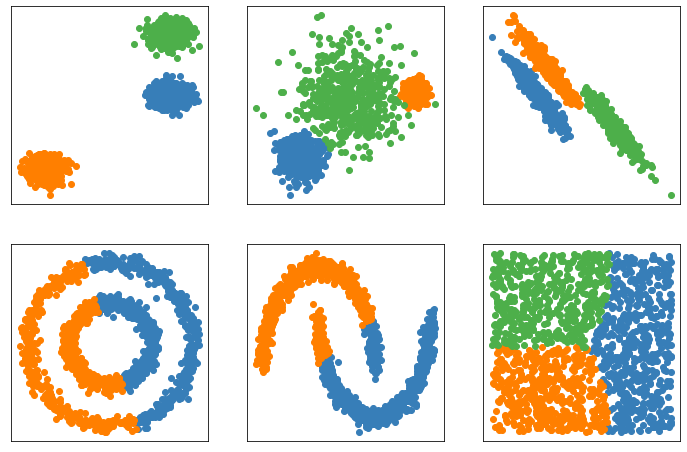

In [129]:
from sklearn.mixture import GaussianMixture

datasets_params_list = [(blobs, {'n_clusters': 3}),
                        (varied, {'n_clusters': 3}),
                        (aniso, {'n_clusters': 3}),
                        (noisy_circles, {'n_clusters': 2}),
                        (noisy_moons, {'n_clusters': 2}),
                        (no_structure, {'n_clusters': 3})]

colors = ['#377eb8', '#ff7f00', '#4daf4a',
          '#f781bf', '#a65628', '#984ea3',
          '#999999', '#e41a1c', '#dede00']

for i, (X, params) in enumerate(datasets_params_list, start=1):
    X = StandardScaler().fit_transform(X)
    y_pred = GaussianMixture(n_components = params['n_clusters']).fit(X).predict(X)
    #y_pred = GaussianMixture(n_components = 5).fit(X).predict(X)
        
    plt.subplot(230+i)
    plt.xticks([]); plt.yticks([])
    
    for c in set(y_pred):
        X_tmp = X[np.where(y_pred==c)]
        plt.scatter(X_tmp[:,0], X_tmp[:,1], color=colors[c])